# Any Image Classifier Using CNN

## 1. Install Dependencies and Setup

### 1.1 Install Depedencies

In [22]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\viran\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\viran\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\viran\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
      

In [4]:
pip list

Package           Version
----------------- --------
asttokens         2.2.1
backcall          0.2.0
colorama          0.4.6
comm              0.1.3
contourpy         1.0.7
cycler            0.11.0
debugpy           1.6.7
decorator         5.1.1
executing         1.2.0
fonttools         4.39.4
ipykernel         6.23.1
ipython           8.14.0
jedi              0.18.2
joblib            1.2.0
jupyter_client    8.2.0
jupyter_core      5.3.0
kiwisolver        1.4.4
matplotlib        3.7.1
matplotlib-inline 0.1.6
nest-asyncio      1.5.6
numpy             1.24.3
opencv-python     4.7.0.72
packaging         23.1
pandas            2.0.2
parso             0.8.3
pickleshare       0.7.5
piexif            1.1.3
Pillow            9.5.0
pip               23.1.2
platformdirs      3.5.3
prompt-toolkit    3.0.38
psutil            5.9.5
pure-eval         0.2.2
Pygments          2.15.1
pyparsing         3.0.9
python-dateutil   2.8.2
pytz              2023.3
pywin32           306
pyzmq             25.1.0



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import tensorflow as tf
import os

In [24]:
os.listdir('data') #list of files inside the directory

['happy', 'sad']

In [25]:
# List all gpus list
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [ ]:
#Avoid OMM errors by setting GPU Memory Consumption
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove dodgy images

In [26]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\viran\AppData\Local\Temp\ipykernel_29588\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [27]:
# add path
data_dir = 'F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//data'

In [28]:
# mention image types
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [29]:
# list folders in image folder
os.listdir(data_dir)

SyntaxError: incomplete input (2494369980.py, line 2)

In [30]:
# go through the each folder in data
for image_class in os.listdir(data_dir):
  # go through every image in the folder
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}", format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}", format(image_path))

Image not in ext list {} F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//data\happy\-and-emotions-positive-joyful-young-beautiful-female-with-fair-straight-hair.jpg
Image not in ext list {} F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//data\happy\42120239-men-human-face-smiling.jpg
Image not in ext list {} F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//data\happy\e-expressions-concept-happy-positive-cheerful-smiling-woman-with-blonde-hair.jpg
Image not in ext list {} F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//data\happy\t-of-pretty-young-caucasian-girl-with-happy-face-and-beautiful-smile-looking.jpg
Image not in ext list {} F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//data\sad\-girl-with-tears-rolling-down-her

### 1.3 Load Data

In [31]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
# initialize data set
# doing labeling and some preprocessing
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=10)

Found 113 files belonging to 2 classes.


In [33]:
data_iterator = data.as_numpy_iterator()

In [34]:
# images and labels are set to an array
# and create size of predefined batch
batch = data_iterator.next()

In [35]:
# images represented as numpy arrays
batch[0].shape

(10, 256, 256, 3)

In [36]:
# class 1 = Sad people
# class 2 = happy people
batch[1]

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

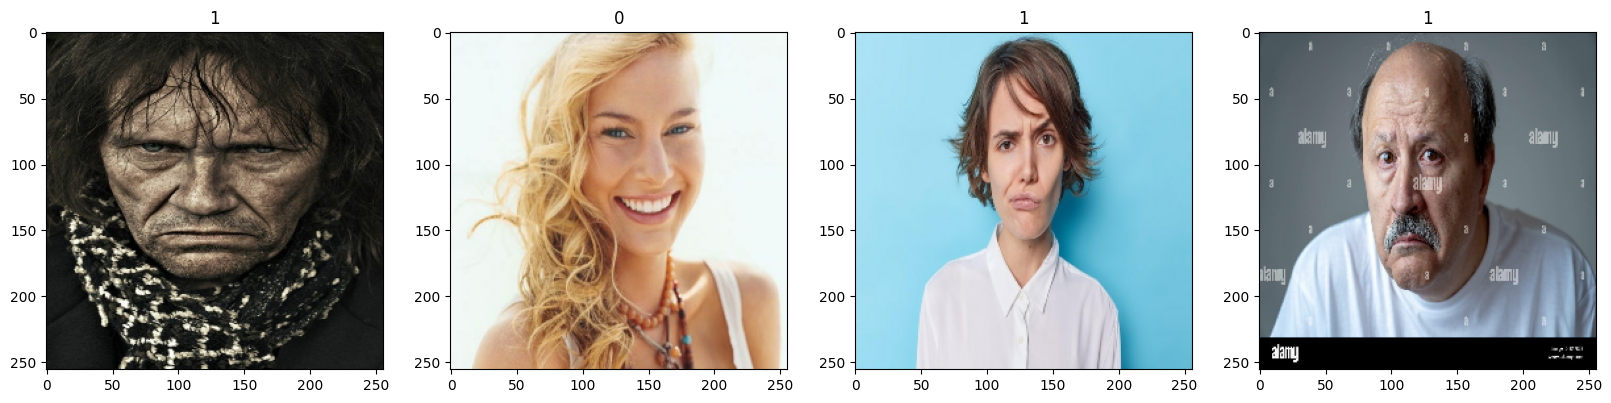

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Prepocess Data

### 2.1 Scale data

In [38]:
batch[0].shape

(10, 256, 256, 3)

In [39]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
data.as_numpy_iterator().next()

(array([[[[0.76862746, 0.76862746, 0.7764706 ],
          [0.76862746, 0.76862746, 0.7764706 ],
          [0.76862746, 0.76862746, 0.7764706 ],
          ...,
          [0.7294118 , 0.7294118 , 0.7372549 ],
          [0.7294118 , 0.7294118 , 0.7372549 ],
          [0.7294118 , 0.7294118 , 0.7372549 ]],
 
         [[0.76862746, 0.76862746, 0.7764706 ],
          [0.76862746, 0.76862746, 0.7764706 ],
          [0.7647059 , 0.7647059 , 0.77254903],
          ...,
          [0.7294118 , 0.7294118 , 0.7372549 ],
          [0.7294118 , 0.7294118 , 0.7372549 ],
          [0.7294118 , 0.7294118 , 0.7372549 ]],
 
         [[0.76862746, 0.76862746, 0.7764706 ],
          [0.76862746, 0.76862746, 0.7764706 ],
          [0.7607843 , 0.7607843 , 0.76862746],
          ...,
          [0.7294118 , 0.7294118 , 0.7372549 ],
          [0.7294118 , 0.7294118 , 0.7372549 ],
          [0.7294118 , 0.7294118 , 0.7372549 ]],
 
         ...,
 
         [[0.7607843 , 0.7607843 , 0.76862746],
          [0.76078

In [41]:
data.as_numpy_iterator().next()[0].max()

1.0

### 2.2 Split Data

In [42]:
# check the size and split according to that
len(data)

12

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 3. Create Deep Learning model

### 3.1 Build Deep Learning Model

In [45]:
# There are many model building APIS
# Here userSequential, coz there we have one source of input and one source of output 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Conv2D - CNN layer of tensoflor equivelent
# MaxPooling2D - condesing layer, goes though images nad condese, like return max of region
# Dense - fully connected layer
# Flatten - having kernel to get one out from dense 
# Dropout - regularization

In [46]:
# Create a model
model = Sequential()

In [47]:
# architectural features
# 16 filters, size of filter 3,3, move 1 pixel each time, activation function, and mention the input shape
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
# There are many optimizers, we use 'adam' optimizer
# define losess, since we use binary classification we use 'BinaryCrossentropy()'
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train

In [50]:
logdir='F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//logs'

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
# get train data set
# epoch - how many time runs the operation
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 4s 349ms/step - loss: 0.9486 - accuracy: 0.5375 - val_loss: 0.6518 - val_accuracy: 0.6500
Epoch 2/20
8/8 [==============================] - 3s 345ms/step - loss: 0.6613 - accuracy: 0.6375 - val_loss: 0.6271 - val_accuracy: 0.6500
Epoch 3/20
8/8 [==============================] - 3s 335ms/step - loss: 0.6132 - accuracy: 0.6125 - val_loss: 0.4759 - val_accuracy: 0.7000
Epoch 4/20
8/8 [==============================] - 3s 366ms/step - loss: 0.4565 - accuracy: 0.7000 - val_loss: 0.2988 - val_accuracy: 0.9500
Epoch 5/20
8/8 [==============================] - 3s 369ms/step - loss: 0.4169 - accuracy: 0.8375 - val_loss: 0.3258 - val_accuracy: 0.8500
Epoch 6/20
8/8 [==============================] - 3s 365ms/step - loss: 0.3727 - accuracy: 0.8250 - val_loss: 0.3724 - val_accuracy: 0.8500
Epoch 7/20
8/8 [==============================] - 3s 382ms/step - loss: 0.3448 - accuracy: 0.8625 - val_loss: 0.2553 - val_accuracy: 0.9500
Epoch 8/20
8/8 [====

### 3.3 Plot Performance

In [53]:
# can use to list and check the perfomrance
hist.history

{'loss': [0.9486457109451294,
  0.6613154411315918,
  0.6131814122200012,
  0.45646747946739197,
  0.41685062646865845,
  0.3727068305015564,
  0.34477925300598145,
  0.38629013299942017,
  0.32183271646499634,
  0.23765578866004944,
  0.19243177771568298,
  0.1541021317243576,
  0.08480638265609741,
  0.033486396074295044,
  0.05141650512814522,
  0.08827492594718933,
  0.12730973958969116,
  0.08052092790603638,
  0.03575211018323898,
  0.015995347872376442],
 'accuracy': [0.5375000238418579,
  0.637499988079071,
  0.612500011920929,
  0.699999988079071,
  0.8374999761581421,
  0.824999988079071,
  0.862500011920929,
  0.8500000238418579,
  0.875,
  0.887499988079071,
  0.925000011920929,
  0.9125000238418579,
  0.9624999761581421,
  1.0,
  0.9750000238418579,
  0.949999988079071,
  0.9624999761581421,
  0.987500011920929,
  1.0,
  1.0],
 'val_loss': [0.6517885327339172,
  0.6270880699157715,
  0.47592848539352417,
  0.29877132177352905,
  0.3258002698421478,
  0.3724316656589508,
  

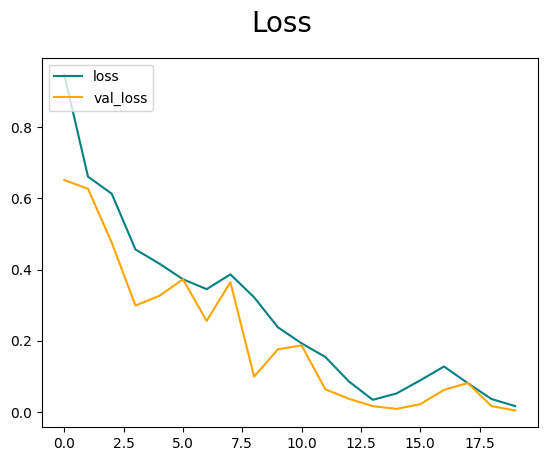

In [54]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Here loss decrease pretty steadily
# If loss decresing but validation lost in increasing, that may be due to over fitting
# need to do some regularizations or change some data

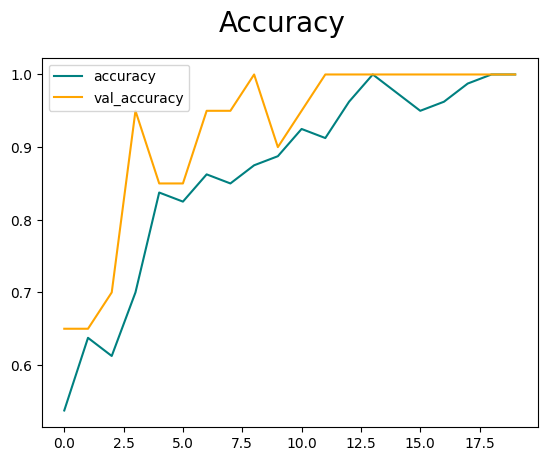

In [55]:
# check accuracy
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [57]:
# Initiate instances
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 150ms/step


In [59]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, BinaryAccuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, BinaryAccuracy:1.0


### 4.2 Test

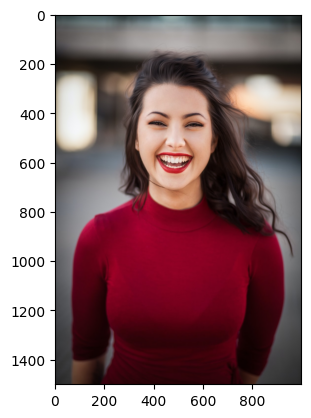

In [60]:
img = cv2.imread('F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//validate//happy_test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

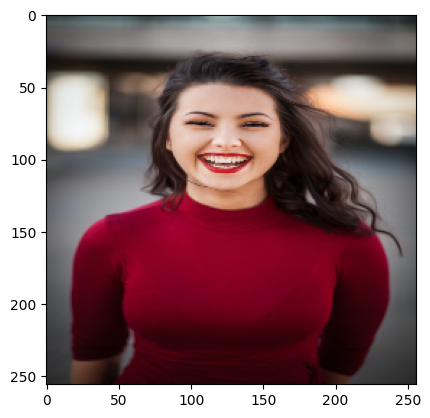

In [61]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
resize.shape

TensorShape([256, 256, 3])

In [63]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [64]:
# This CNN expect to pass batch of images  
# so we enscapsulate image in to set
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [65]:
if yhat < 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## 5. Save Model

### 5.1 Save the Model

In [66]:
from tensorflow.keras.models import load_model

In [67]:
# Save as h5 to serialize it, like zip
model.save(os.path.join('F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//models', 'happysadmodel.h5'))

c:\Users\viran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
# Load the model
new_model = load_model(os.path.join('F://4th Yr//CS421 - Project in Computing II//Code//Build a Deep CNN Image Classifier with ANY Images//models', 'happysadmodel.h5'))

In [70]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


In [71]:
if yhatnew < 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
